In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, ColumnDataSource, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.transform import transform


cm = np.load('cm.npy')
print(cm)
plt.imshow(cm, cmap='binary')



[[ 87.   0.   0. ...   0.   0.   0.]
 [  0.  17.   0. ...   1.   0.   1.]
 [  0.   0.  28. ...   0.   0.   0.]
 ...
 [  1.   0.   0. ... 235.   0.   0.]
 [  0.   0.   0. ...   2. 102.   7.]
 [  0.   0.   0. ...   0.   1.  88.]]


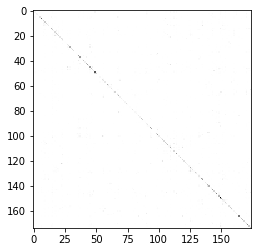

In [2]:
plt.imshow(cm, cmap='binary')

In [3]:
df_cm = pd.DataFrame(cm)

In [4]:
df_cm.shape

(174, 174)

In [5]:
!ls

category.txt  confustion_matrix.py  Untitled1.ipynb
cm.npy	      myPlot.html	    Untitled.ipynb


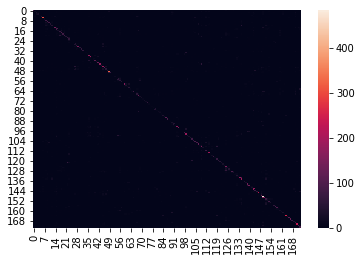

In [6]:
#sn.set(font_scale=1.4)#for label size
#sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
sn.heatmap(df_cm)
plt.show()

In [57]:
f = open('category.txt', 'r+')
lines = [line for line in f.readlines()]
f.close()
print(len(lines))

174


In [58]:
#lines = list(str(range(1,175)))

In [59]:
f = open('category.txt', 'r')
lines = f.readlines()
for line in lines:
    line =line[:-2]

In [60]:
#lines = list(range(1,175))

In [61]:
df_b = pd.DataFrame(cm,columns=lines,
    index=lines)
df_b.index.name = 'Treatment'
df_b.columns.name = 'Prediction'


In [62]:
# Prepare data.frame in the right format
df_b = df_b.stack().rename("value").reset_index()


In [63]:
# here the plot :
output_file("myPlot.html")

# You can use your own palette here
colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']

# Had a specific mapper to map color with value
mapper = LinearColorMapper(
    palette=colors, low=df_b.value.min(), high=df_b.value.max())
# Define a figure
p = figure(
    plot_width=2000,
    plot_height=2000,
    title="My plot",
    x_range=list(df_b.Treatment.drop_duplicates()),
    y_range=list(df_b.Prediction.drop_duplicates()),
    toolbar_location=None,
    tools="",
     x_axis_location="above",
    hover_tool=True 
)
# Create rectangle for heatmap
p.rect(
    x="Treatment",
    y="Prediction",
    width=1,
    height=1,
    source=ColumnDataSource(df_b),
    line_color=None,
    fill_color=transform('value', mapper))
# Add legend
color_bar = ColorBar(
    color_mapper=mapper,
    location=(0, 0),
    ticker=BasicTicker(desired_num_ticks=len(colors)))

p.add_layout(color_bar, 'right')

show(p)

AttributeError: unexpected attribute 'hover_tool' to Figure, possible attributes are above, aspect_scale, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, css_classes, disabled, extra_x_ranges, extra_y_ranges, h_symmetry, height, hidpi, inner_height, inner_width, js_event_callbacks, js_property_callbacks, layout_height, layout_width, left, lod_factor, lod_interval, lod_threshold, lod_timeout, match_aspect, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, name, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, output_backend, plot_height, plot_width, renderers, right, sizing_mode, subscribed_events, tags, title, title_location, toolbar, toolbar_location, toolbar_sticky, v_symmetry, width, x_range, x_scale, y_range or y_scale

In [67]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file

factors = ["a", "b", "c", "d", "e", "f", "g", "h"]
x =  [50, 40, 65, 10, 25, 37, 80, 60]

dot = figure(title="Categorical Dot Plot", tools="", toolbar_location=None,
            y_range=factors, x_range=[0,100])

dot.segment(0, factors, x, factors, line_width=2, line_color="green", )
dot.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3, )

factors = ["foo 123", "bar:0.2", "baz-10"]
x = ["foo 123", "foo 123", "foo 123", "bar:0.2", "bar:0.2", "bar:0.2", "baz-10",  "baz-10",  "baz-10"]
y = ["foo 123", "bar:0.2", "baz-10",  "foo 123", "bar:0.2", "baz-10",  "foo 123", "bar:0.2", "baz-10"]
colors = [
    "#0B486B", "#79BD9A", "#CFF09E",
    "#79BD9A", "#0B486B", "#79BD9A",
    "#CFF09E", "#79BD9A", "#0B486B"
]

hm = figure(title="Categorical Heatmap", tools="hover", toolbar_location=None,
            x_range=factors, y_range=factors)

hm.rect(x, y, color=colors, width=1, height=1)

output_file("categorical.html", title="categorical.py example")

show(row(hm, dot, sizing_mode="scale_width"))  # open a browser

